In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, Flatten

┌ Info: Recompiling stale cache file /usr/people/briandd/.julia/compiled/v1.2/pulse_input_DDM/m8WoA.ji for pulse_input_DDM [c2542da2-1f7d-11e9-2506-87691095ebb2]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **



In [3]:
θ_syn = θchoice(θz=θz(σ2_i = 1., B = 13., λ = -0.5, σ2_a = 10., σ2_s = 1.0,
    ϕ = 0.4, τ_ϕ = 0.02), bias=0.1, lapse=0.1);

In [4]:
_, data = synthetic_data(;θ=θ_syn, ntrials=5_000, rng=1, dt=2e-2);

In [5]:
n = 53

53

In [6]:
loglikelihood(θ_syn, data, n)

-1925.615111140547

In [7]:
using Random

fit = vcat(trues(7),falses(2),trues(2));
x0 = vcat([0.1, 15., -0.1, 20., 0.5, 0.2, 0.008,0.,0.], [0.,0.01])
lb=vcat([0., 8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.])
ub=vcat([2., 30., 5., 100., 2.5, 1.2,  1.,     30., 30.], [5., 1.]);

In [8]:
using Random

fit = vcat(trues(7),falses(2),trues(2));
x0 = vcat([0.1, 15., -0.1, 20., 0.5, 0.2, 0.008,0.,0.], [0.,0.01])
lb=vcat([0., 8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.])
ub=vcat([2., 30., 5., 100., 2.5, 1.2,  1.,     30., 30.], [5., 1.]);

function fit_x0(rng, fit, x0, lb, ub, data, n)

    Random.seed!(rng)
    x00 = lb + (ub - lb) .* rand(length(x0))
    x00[2] = 15.
    x00[8:9] .= 0.;

    options = choiceoptions(x0=x00, fit=fit, 
        lb=vcat([0.,  8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.]),
        ub=vcat([30., 32., 5., 200., 5.,  1.2,  1.,     30.,  30.],  [5., 1.]))

    model, output = optimize(data, options, n; f_tol=1e-9, extended_trace=true, show_trace=false, scaled=false)
    
end

fit_x0 (generic function with 1 method)

In [9]:
output = map(rng-> fit_x0(rng, fit, x0, lb, ub, data, n), 1:4)
traces = map(y-> hcat(map(x-> x.metadata["x"], y[2].trace)...), output)

optimization complete. converged: true 

optimization complete. converged: true 

optimization complete. converged: true 

optimization complete. converged: true 



4-element Array{Array{Float64,2},1}:
 [0.47206669132409385 0.46231316926969923 … 29.999998214791518 29.999999210652913; 15.0 14.992644604902193 … 8.750570233733272 8.750570238839684; … ; 4.8666636689879965 4.866448807407566 … 0.5666036809825479 0.5666036809825479; 0.5557510873245723 0.5557379715813772 … 0.5041764931664574 0.5041764931664574]     
 [0.7335928248798487 0.7335042791671761 … 29.999998927639083 29.999999640475206; 15.0 14.99970759683094 … 8.974316792347267 8.97431678902884; … ; 1.8956654998062161 1.8956607811378094 … 0.04964622653003558 0.04964622653003558; 0.14383562117576143 0.14398973064507073 … 0.49997923541946987 0.49997923541946987]  
 [1.623396809991723 1.623306896842189 … 29.999998789780086 29.999999440444384; 15.0 14.999995264571576 … 8.749557380110218 8.74955739652881; … ; 0.572251384524507 0.5722513205638353 … -7.897671180493442e-5 -7.897671180493442e-5; 0.4644219211852372 0.464422315630559 … 0.49999968190646626 0.49999968190646626]   
 [1.360158471871482 1.36004

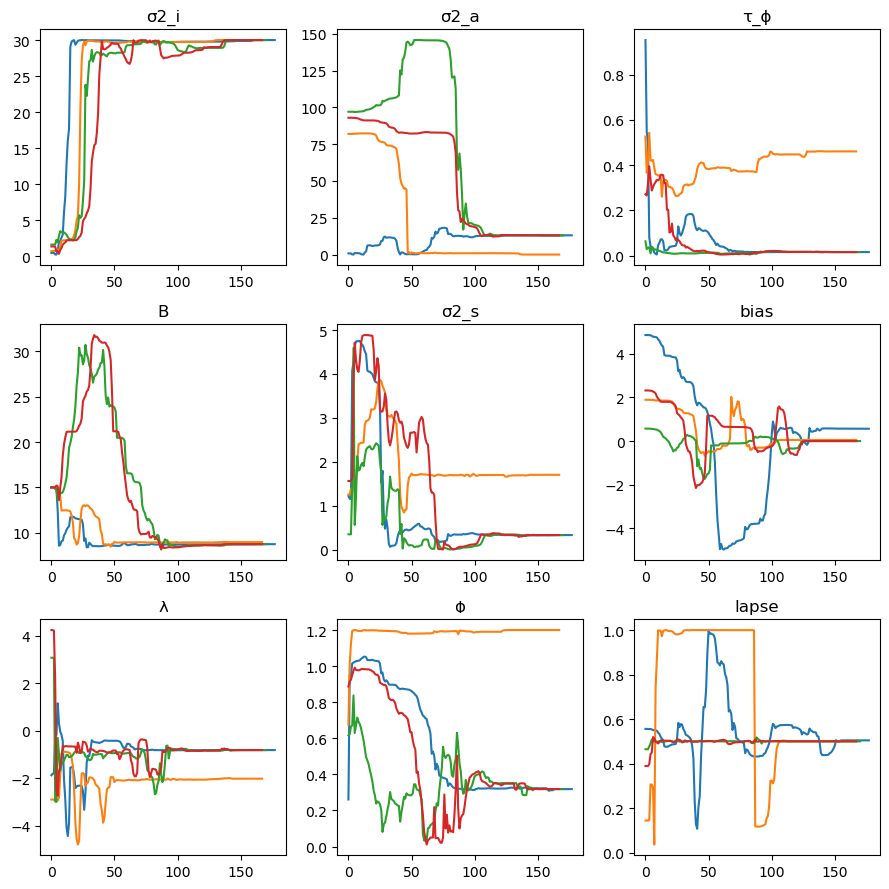

In [16]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces)
    ax[i].set_title(name[i])
end

tight_layout() 